To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/powenfang/Data-Science-for-Business-2021Fall-Elkan/blob/master/Homeworks/HW4-Fall2021.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>

# Homework 4

## Part I: Sentiment Analysis for Movie Reviews

Sentiment analysis is a hot topic in data science right now due to the immense amount of user-generated text data being created every day online.  Businesses can now look at what is being said about them on review sites to get an idea of how well they are liked, how much they are disliked, and what they can do to improve.  While most of this data is unlabeled, some sites also ask users to provide a numerical or star rating.  This allows us to build a classifier for positive/negative reviews using the star rating as a label, which could then be hypothetically applied to unlabeled text.

IMDB collects information about movies and lets users write their own reviews, as well as provide a 1-10 numerical rating.   The data for this assignment can be found in 'IMDB_TRAIN.csv' and IMDB_TEST.csv', the training and test data respectively. It consists of thousands of positive and negative reviews collected from IMDB.  The ratings have been binarized by labeling anything with score between 7 and 10 as “P” and anything between 1 and 4 with “N” (there are no “neutral” reviews in the data).  You will build and evaluate a system that classifies these movie reviews as positive or negative.

__Load the training data and the test data. No points for this.__

In [ ]:
#If opening in colab run this cell
!git clone https://github.com/powenfang/Data-Science-for-Business-2021Fall-Elkan
%cd Data-Science-for-Business-2021Fall-Elkan/Homeworks/

In [ ]:
import pandas as pd

# Remember to change this to the path of your files.
train_path = 'data/IMDB_TRAIN.csv'
test_path = 'data/IMDB_TEST.csv'

columns = ['text', 'class']
df_imdb_train = pd.read_csv(train_path, names=columns)
df_imdb_test = pd.read_csv(test_path, names=columns)
df_imdb_train.head()

text class
0  'If you hit your teens in the 70s as I did you...     N
1  'Excellent endearing film with Peter Falk and ...     P
2  'Oh dear what a horrid movie. The production w...     N
3  'This is a terrible production of Bartleby tho...     N
4  'I actually have a fondness for Christopher Le...     N

__1. Build a Bernoulli Naive Bayes model to classify reviews according to their sentiment using a binary count vectorizer (check out the text mining module in the class notebooks if you do not know what this question is talking about). Test its accuracy and ROC AUC on the test data.  Is the accuracy good compared to just predicting a positive sentiment for all reviews?__

In [ ]:
# Your answer here.

__2. Pick a few reviews in the test set that were incorrectly classified and read them through.  Are there any words in these misclassified reviews that may have misled the classifier?  Explain with at least three examples for each type of error (i.e., false positive and false negative).__
* For example: Instance number X contains the sentence, “Even her worst . . . I will stop here to avoid the spoiler.”  Even though this is actually positive, it was classified as a negative review; I would guess that this is due to the word “worst” in the review.

In [ ]:
# Your answer here.

__3. Improve the accuracy of your model on the test data. Try at least two of the following to do this:__
* __Use a non-binary count vectorizer or a tf-idf count vectorizer.__
* __Use n-grams.__
* __Remove stopwords.__

__Try one other classifier besides Bernoulli Naive Bayes.__
__Please report the accuracies__

In [ ]:
# Your answer here.

## Part II: Multi-Class Text Classification

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. 

Suppose you've been hired by a finance institution that wants to classify incoming consumer complaints in product categories in order to forward them to the most appropriate customer support agents. You have a sample of the complaints that have been addressed in the past, each of them labeled as one category by the agent that addressed the complaint. Each complaint is assigned to one and only one category. 

Let's take a look at the data.

__Load the data. No points for this.__

In [ ]:
# Remember to change this to the path of your file.
complaints_path = 'data/complaints_sample.csv'

data = pd.read_csv(complaints_path)
data.head()

Consumer complaint narrative  \
0  This is not a duplicate case. Please escalate ...   
1  I reported the problem to Money gram agent. wo...   
2  Medical debt is not mine, debt is my sons who ...   
3  Someone called me yesterday morning, XX/XX/201...   
4  This is a debt with Conn 's - I am not 30 days...   

                                             Product  
0                        Credit card or prepaid card  
1  Money transfer, virtual currency, or money ser...  
2                                    Debt collection  
3                                    Debt collection  
4                                    Debt collection

__1. Print how many complaints there are for each product category.__

In [ ]:
# Your answer here.

__2. Split the data into a training and a test set. Build a logistic regression model to classify complaints according to product categories. Report its accuracy when applied to the test set. Why is this number relatively low compared to the binary accuracy in Part I? HINT: You may want to use [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) to transform the target variable into a categorical variable. Take a look at the sample code below.__

In [ ]:
# Example of how to transform a text variable into a categorical variable
Y, cat_names = data['Product'].factorize() 

In [ ]:
# Your answer here.

__3. Make a confusion matrix that shows the errors made by your model. Use the test set labels and your predictions for the test set to build the matrix. Plot the confusion matrix using a Seaborn heatmap. What would perfect predictions look like? Give an example of one systematic type of error that you see. How can you tell that this is a systematic error? Why do you think such errors occur? HINT: Below there is code building and plotting a confusion matrix using the entire data and random predictions. The code removes the diagonal to highlight prediction errors.__

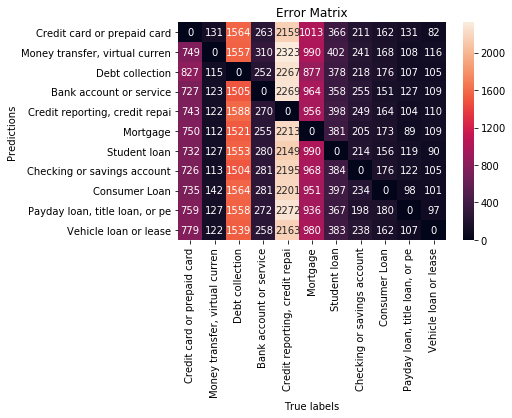

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt


tick_labels = [c[:30] for c in cat_names]
def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(cat_names)), len(Y))
random_conf_mat = confusion_matrix(random_predictions, Y)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

In [ ]:
# Your answer here.

__4. Suppose that the priority level of complaints varies by product category. You know that higher priority complaints need to be addressed faster. You also know that complaints incorrectly classified by the model will be given the correct classification (and therefore also the correct priority) by the first agent to which the complaint is assigned. If the agent has no knowledge about the product category of the complaint, he/she can forward the complaint to someone else. This is how priority level varies by product:__

__High priority__
* 'Money transfer, virtual currency, or money service'
* 'Bank account or service'
* 'Checking or savings account'

__Normal priority__
* 'Credit card or prepaid card'
* 'Mortgage'
* 'Student loan'
* 'Consumer Loan'
* 'Payday loan, title loan, or personal loan'
* 'Vehicle loan or lease'

__Low priority__
* 'Credit reporting, credit repair services, or other personal consumer reports'
* 'Debt collection'

__Below you will find three cost matrices. Compute the total cost of your model according to each of them. If you were to compare multiple models, which cost matrix do you think would be better to compare the models? Why? Would you consider making any modifications to the cost matrix that you chose? If so, explain what would you consider changing and why. HINT: Below there is a sample code of how to compute the total cost of the random predictions.__

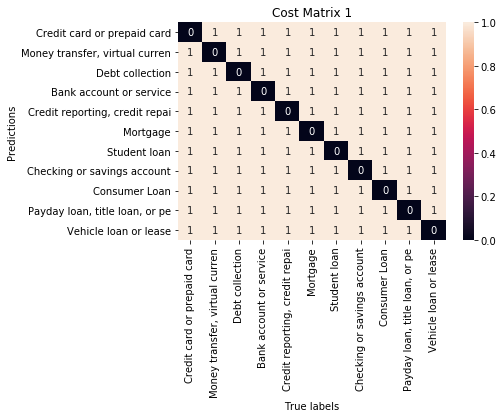

In [ ]:
cost_matrix_1 = np.array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_1, 'Cost Matrix 1')

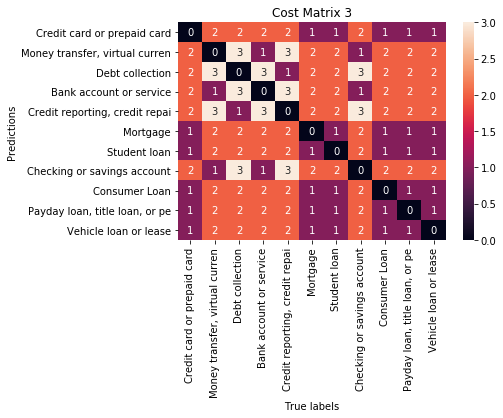

In [ ]:
cost_matrix_2 = np.array([[0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 2],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [2, 3, 1, 3, 0, 2, 2, 3, 2, 2, 2],
                          [1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1],
                          [1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1],
                          [1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0]])
plot_matrix(cost_matrix_2, 'Cost Matrix 3')

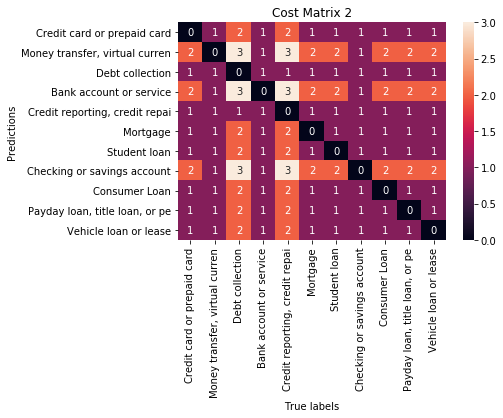

In [ ]:
cost_matrix_3 = np.array([[0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1],
                          [2, 0, 3, 1, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
                          [2, 1, 3, 0, 3, 2, 2, 1, 2, 2, 2],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1],
                          [1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1],
                          [2, 1, 3, 1, 3, 2, 2, 0, 2, 2, 2],
                          [1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1],
                          [1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0]])
plot_matrix(cost_matrix_3, 'Cost Matrix 2')

In [ ]:
# Replace random_conf_mat with the confusion matrix you generated in the last question.

print("Cost with matrix 1: ", (random_conf_mat * cost_matrix_1).sum())
print("Cost with matrix 2: ", (random_conf_mat * cost_matrix_2).sum())
print("Cost with matrix 3: ", (random_conf_mat * cost_matrix_3).sum())

Cost with matrix 1:  68653
Cost with matrix 2:  121265
Cost with matrix 3:  132332


In [ ]:
# Your answer here.